<a href="https://colab.research.google.com/github/RafaelAndradeDEV/Airbnb_Barcelona/blob/Learning/Analisando_os_Dados_do_Airbnb_da_cidade_de_Barcelona.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 4.0**
*Notebook de Análise de dados da cidade de Barcelona, desafio do primeiro módulo do curso [sigmoidal.ai](https://sigmoidal.ai)*
* Visite também essa análise no [Medium](), uma abordagem mais explicativa e menos teórica.


---

# Análise dos Dados do Airbnb - Barcelona


<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>


O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.


## Cidade de Barcelona

**Barcelona** possui uma população de 1,85 milhões de pessoas, uma área de 91,4 km^2. Entre 2010 e 2019, o número de viajantes que desembarcam no aeroporto de Barcelona saltou de pouco menos de 30 milhões para 53 milhões. Após a pandemia, o turismo de Barcelona está voltando ao normal, sendo esse responsável por movimentar um valor correspondente a **nove bilhões de euros por ano**, intervalo entre **10% e 12% do PIB local**.

Ocupa a **17° posição no ranking de cidades mais visitadas do mundo**, com bons salários e uma ótima qualidade de vida, atrativos importantes para turistas e pessoas que buscam oportunidade de trabalhar na Europa

A cidade de **Barcelona é dividida em 10 Distritos:** • Ciutat Vella / • Eixample / • Sants-Montjuïc / • Corts / • Sarrià - Sant Gervasi / • Gràcia / • DHorta - Guinardó / • El Nou Barris / • Sant Andreu / • Sant Martí


Cidade bonita que agrada todo tipo de gosto, amantes da arte, com seus belos museus, amantes do futebol, com o belíssimo **"Camp Nou"**, palco de diversos jogos importantes e históricos, além dos vários pontos turísticos com muitas histórias a serem contadas

**Neste *notebook*, Estarei analisando os dados referentes à cidade de Barcelona, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados


In [2]:
# importar os pacotes necessariosa
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/spain/catalonia/barcelona/2023-06-10/visualisations/listings.csv", index_col = False)

## Análise dos Dados


**Dicionário das variáveis**

* `id` - Identificação dada ao registro do imóvel no aplicativo
* `name` - Descrição resumida do imóvel
* `host_id` - Identificação dada pelo aplicativo para o dono da casa
* `host_name` - Nome do proprietário
* `neighbourhood_group` - Nome do Distrito(Existem 10 distritos)
* `neighbourhood` - Nome do Bairro
* `latitude` - Coordenada da Latitude relativo ao endereço do imóvel
* `longitude` - Coordenada da Longitude relativo ao endereço do imóvel
* `room_type` - Tipo do imóvel, podendo ser ou: Casa/Apartamento completo | Quarto de Hotel | Quarto compartilhado | Quarto privado
* `price` - Preço para alugar o imóvel
* `minimum_nights` - Quantidade mínimas de noites para disponibilização do aluguel
* `number_of_reviews` - Número de avaliações
* `last_review` - Data da última avaliação
* `reviews_per_month` - Quantidade de avaliações por mês
* `calculated_host_listings_count` - Quantidade de imóveis do mesmo anfitrião
* `availability_365` - Número de dias de disponibilidade de 365 dias
* `number_of_reviews_ltm` - Número de avaliações que a propriedade recebeu nos últimos 12 meses
* `license` - Número do registro, licença ou permissão

**OBS: Os valores convertidos de Euro para Real ao longo da análise, foram feitos quando a cotação foi de €1 = R$5,37(04/09/2023)**

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [4]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,18674,Rental unit in Barcelona · ★4.35 · 3 bedrooms ...,71615,Mireia And Maria,Eixample,la Sagrada Família,41.405560,2.172620,Entire home/apt,210,1,35,2023-04-07,0.29,28,18,8,HUTB-002062
1,23197,Rental unit in Sant Adria de Besos · ★4.77 · 3...,90417,Etain (Marnie),Sant Martí,el Besòs i el Maresme,41.412907,2.220633,Entire home/apt,250,4,72,2023-05-29,0.48,2,185,13,HUTB005057
2,41952,Rental unit in Barcelona · ★4.35 · 2 bedrooms ...,183340,Teresa,Gràcia,el Camp d'en Grassot i Gràcia Nova,41.405680,2.169430,Entire home/apt,172,3,66,2023-05-26,0.49,5,269,22,HUTB-003549
3,32711,Rental unit in Barcelona · ★4.43 · 2 bedrooms ...,135703,Nick,Gràcia,el Camp d'en Grassot i Gràcia Nova,41.405660,2.170150,Entire home/apt,186,2,91,2023-03-22,0.63,3,256,24,HUTB-001722
4,46153,Rental unit in Barcelona · ★4.20 · 2 bedrooms ...,90417,Etain (Marnie),Ciutat Vella,"Sant Pere, Santa Caterina i la Ribera",41.389560,2.177590,Entire home/apt,63,31,5,2022-07-31,0.03,2,176,1,Exempt


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

In [5]:
# identificar o volume de dados do DataFrame
print(f"Quantidade de entradas: {df.shape[0]}\nQuantidade de colunas: {df.shape[1]}\n")

# verificar as 5 primeiras entradas do dataset
df.dtypes

Quantidade de entradas: 17230
Quantidade de colunas: 18



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

In [6]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
values = ((df.isnull().sum()*100)/df.shape[0]).sort_values(ascending=False)[:5]
for index, keys in enumerate(values.keys()):
  print(f"A porcentagem de valores ausentes em {keys} é de {values[index]:.2f}%")


A porcentagem de valores ausentes em license é de 48.57%
A porcentagem de valores ausentes em reviews_per_month é de 23.40%
A porcentagem de valores ausentes em last_review é de 23.40%
A porcentagem de valores ausentes em host_name é de 0.01%
A porcentagem de valores ausentes em minimum_nights é de 0.00%


* É possível perceber que aproximadamente **1/4 dos dados não possuem uma última avaliação(coluna "last_review")**.
* O mesmo é encontrado na coluna "reviews_per_month", um indicadivo que esse imóveis não foram ou não estão sendo alugados frequentemente até o momento da coleta de dados.
* Aproximadamente **50% da coluna "license" são valores ausentes**, ou seja, boa parte dos imóvies não tem uma licença com o Governo, sendo essa uma forma de regulamentar o mercado hoteleiro.

### **Q3. Qual o tipo de distribuição das variáveis?**

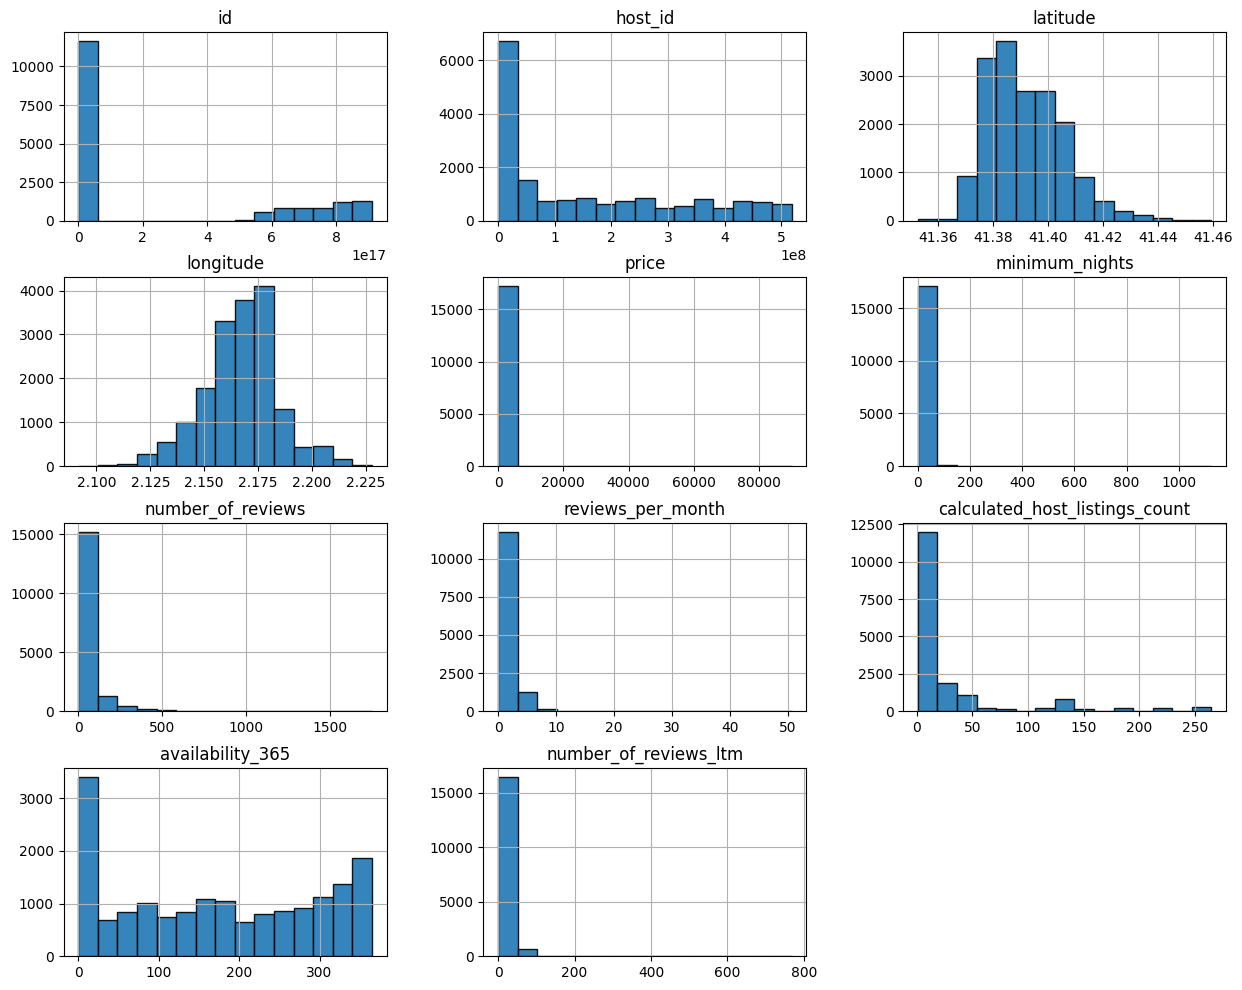

In [7]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15,
        figsize=(15,12),
        ec = "k",
        grid=True,
        alpha = 0.9);

### **Q4. Há *outliers* presentes?**

In [8]:
df[["price", "minimum_nights", "number_of_reviews", "availability_365", "calculated_host_listings_count"]].describe().round()

,price,minimum_nights,number_of_reviews,availability_365,calculated_host_listings_count
count,17230.0,17230.0,17230.0,17230.0,17230.0
mean,178.0,14.0,42.0,172.0,28.0
std,877.0,34.0,84.0,125.0,53.0
min,0.0,1.0,0.0,0.0,1.0
25%,55.0,1.0,1.0,56.0,1.0
50%,111.0,3.0,7.0,171.0,5.0
75%,214.0,31.0,43.0,293.0,25.0
max,90000.0,1125.0,1751.0,365.0,265.0


* É possível perceber através de uma análise estatística que a coluna **"Price"** possui cerca de 75% dos valores abaixo de €214.00, equivalente a R$1,138.96. E um valor máximo de €90000.00.
* Já na coluna **"Minimum_nights"**, possui um percentil de 75% dos valores correspondendo ao valor de no máximo 31 noites mínimas para alugar o imóvel.
* **OBS: Uso de ponto para separação decimal nos valores de Preço**.
*  Portanto, é perceptível que existe outliers no dataset, que alteram possíveis análises futuras, será necessário fazer a remoção destes.

#### Uma boa ferramenta que auxilia a observar as métricas estatísticas e a possibilidade de haver outliers, é a plotagem no formato "box":


* Boxplot da coluna **"Price"**:

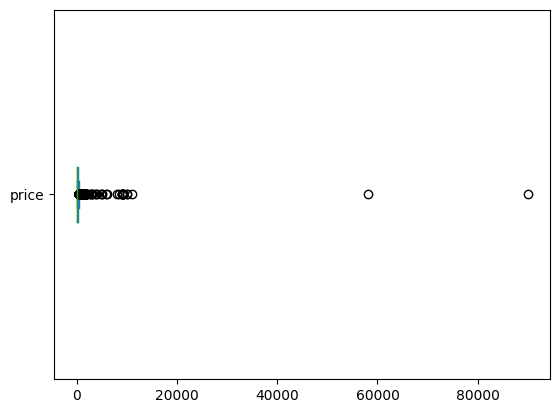

In [9]:
df.plot(kind = "box", column=["price"],  vert=False);
#(df.plot(kind = "box", vert=False));


* Boxplot da coluna de **"minimum_nights"**:

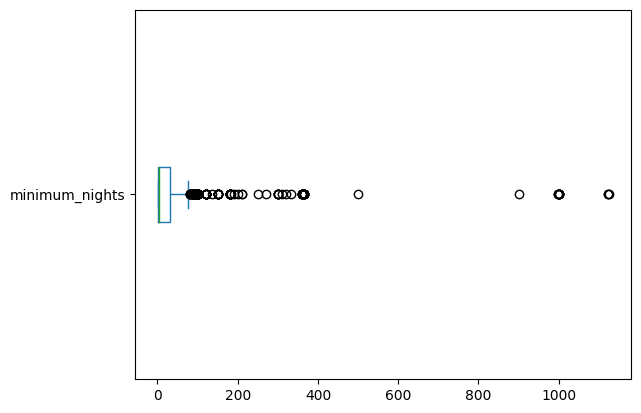

In [10]:
df.plot(column=["minimum_nights"], kind="box", vert = False);

É possível observar que existem valores bem afastados do conjunto principal, essas variáveis chamamos de **"Outliers"**

#### Uma breve explicação do que é um boxplot e como interpretar:

O boxplot é um diagrama de caixa construído utilizando as referências de valores mínimos e máximos, primeiro(percentil 25%) e terceiro quartil(percentil 75%), mediana(Percentil 50%) e outliers da base de dados. que possui algumas das variáveis estatístiscas como:
* Min: Menor valor no conjunto de dados(Primeira barra da esquerda para direita)
* Percentil 25%: Representação dos 25% até 50% dos dados(segunda barra, Começo da caixa)
* Percentil 50%(Mediana): Representação dos 50% até 75% dos dados(terceira barra, linha que "corta" a caixa)
* Percentil 75%: Representação dos 75% até o 100% dos dados (Quarta barra, início da linha reta até o Max)
* Max: Maior valor no conjunto de dados(Última barra)

Do valor mínimo até o início da caixa, estão representados 25% dos dados, já dentro da caixa estão representados mais 50% dos dados, e por fim, a haste superior representa os outros 25% restantes.

**Interpretação:**
* É possível analisar aspectos como Variabilidade, desvio padrão, média e mediana.
* Quanto Maior a caixa, maior o desvio padrão, logo maior a variabilidade.
* Para observar média e mediana, temos que observar as coordenadas em que a caixa/diagrama está.
* A caixa representa os valores centrais da base de dados, onde no histograma essa parte é representada pelas barras mais altas, ou seja, dados com maior frequência.


#### Limpeza de dados:

 Dessa forma é recomendado fazer a limpeza desses outliers:

In [11]:
# Porcentagem do valor considerados como outliers
print(f"A porcentagem dos valores que possuem um valor maior que 32 noites mínimas, na coluna de 'minimum_nights' é {len(df[df.minimum_nights > 32])/df.shape[0]*100:.2f}%") # Pensando em uma análise feita de uso mínimo de 1 mês
print(f"A porcentagem dos valores que possuem um valor maior que €600.00, na coluna de 'Price' é {(len(df[df.price > 600])/df.shape[0])*100:.2f}%")
print("\n# Portanto, visto que são poucos valores outliers, podemos fazer a remoção sem haver preocupação de afetar o conjunto de dados no dataset")

A porcentagem dos valores que possuem um valor maior que 32 noites mínimas, na coluna de 'minimum_nights' é 3.11%
A porcentagem dos valores que possuem um valor maior que €600.00, na coluna de 'Price' é 2.08%

# Portanto, visto que são poucos valores outliers, podemos fazer a remoção sem haver preocupação de afetar o conjunto de dados no dataset


In [12]:
# Copia do dataset principal, para aplicarmos as exclusões e analisarmos mais detalhadamente.
df_clean = df.copy()


In [13]:
# Fazer a limpeza dos dados Outliers:
print(df.shape)
df_clean.drop(df_clean[df_clean.minimum_nights > 60].index, axis=0, inplace= True)
df_clean.drop(df_clean[df_clean.price > 600].index, axis=0, inplace=True)
print(df_clean.shape)
linhas_excluidas = df.shape[0]-df_clean.shape[0]
print(f"Foram excluidos {linhas_excluidas} linhas do dataset, representando {(linhas_excluidas/df.shape[0])*100:.2f}% do total")

(17230, 18)
(16692, 18)
Foram excluidos 538 linhas do dataset, representando 3.12% do total


#### Após a remoção dos outliers, os boxplots ficam mais fáceis de interpretar:

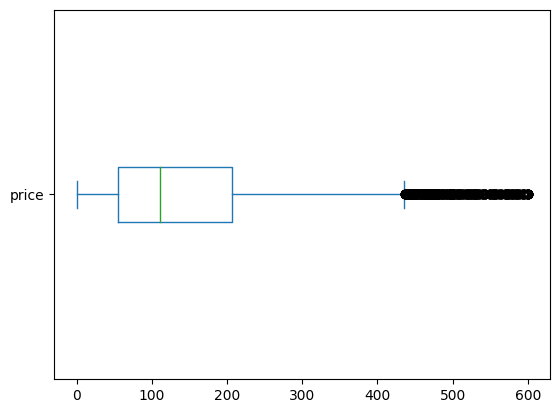

In [14]:
df_clean.plot(kind = "box", column=["price"],  vert=False);
#(df.plot(kind = "box", vert=False));

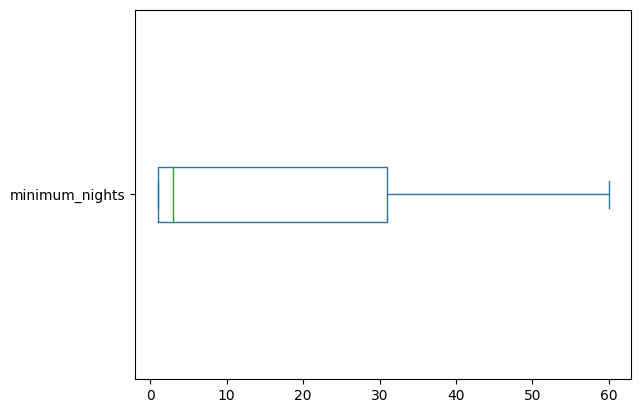

In [15]:
df_clean.plot(column=["minimum_nights"], kind="box", vert = False);

#### Histograma após ser feito a limpeza de dados na coluna "Price" e "Minimum_nights":

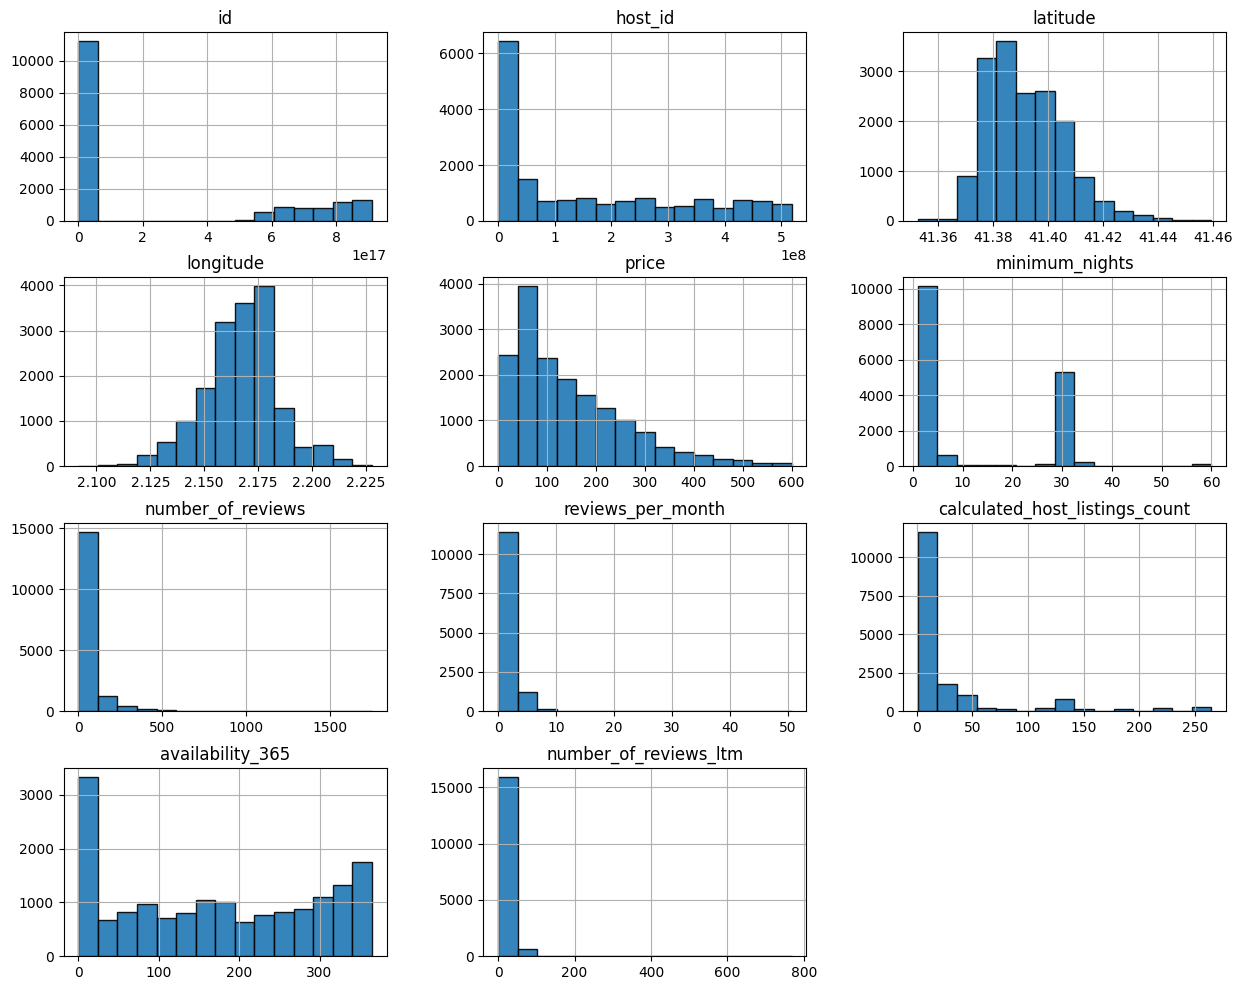

In [16]:
# Após a limpeza dos dados:
df_clean.hist(bins=15,
        figsize=(15,12),
        ec = "k",
        grid=True,
        alpha = 0.9);

### **Q5. Quais são as quantidade mínimas de noite que são mais oferecidas no modelo de aluguel?**

In [17]:
((df_clean.groupby(["minimum_nights"]).minimum_nights.count())/df_clean.shape[0]).sort_values(ascending=False)[:5]

minimum_nights
1     0.294932
32    0.172238
2     0.138210
3     0.137791
31    0.119818
Name: minimum_nights, dtype: float64

In [18]:
intervalo_mensal = df_clean.minimum_nights[(df_clean["minimum_nights"] <= 32) & (df_clean["minimum_nights"] >= 28)]
intervalo_final_de_semana = df_clean.minimum_nights[(df_clean["minimum_nights"] <= 3) & (df_clean["minimum_nights"] >= 1)]

print(intervalo_mensal.count().sum()/df_clean.shape[0])
print(intervalo_final_de_semana.count().sum()/df_clean.shape[0])

0.325065899832255
0.5709321830817158


* É possível perceber que boa parte dos imóveis estão disponíveis para pessoas que querem alugar por no mínimo 1 noite(Cerca de 29.4% dos imóveis).
* Já imóveis que praticam o aluguel mensal(Com no mínimo 28 noites e 32 noites no máximo) correspondem a 32,5% do total.
* Outro intervalo significativo de noites mínimas é entre 1-3 noites, correspondendo à 57% dos imóveis.

### **Q6. Qual a média dos preços de aluguel?**

In [19]:
# ver a média da coluna `price`
media_preco_aluguel = df_clean.price.mean().round(2)
print(media_preco_aluguel)


144.97


* O valor médio dos valores de aluguel dos imovéis é: €144.97, equivalente à R$774.52

#### Analisando a média dos valores agrupando por distritos:

In [20]:
(df_clean.groupby(["neighbourhood_group"]).price.mean()).sort_values(ascending=False)

neighbourhood_group
Eixample               175.467220
Les Corts              145.596923
Sarrià-Sant Gervasi    144.445274
Gràcia                 142.695172
Sant Martí             141.813209
Ciutat Vella           124.821142
Sants-Montjuïc         122.663925
Horta-Guinardó          88.539394
Sant Andreu             78.736364
Nou Barris              64.200000
Name: price, dtype: float64

* O Distrito de "Eixample" possui o maior valor médio dos preços para alugar, um valor de €175.46, em Reais: R$941.87. Um preço acima da média entre os distritos

* O Distrito de "Nou Barris" possui o menor valor médio dos preços para alugar, sendo um valor de €64.20, em Reais: R$344.62. Um preço bem abaixo da média total.

### **Q7. Qual a correlação existente entre as variáveis**

In [21]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()
# mostrar a matriz de correlação
display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.381572,0.183441,0.113760,0.130495,0.172513
minimum_nights,-0.381572,1.000000,-0.229313,-0.284605,0.100168,0.180918
number_of_reviews,0.183441,-0.229313,1.000000,0.511907,-0.119814,0.018477
reviews_per_month,0.113760,-0.284605,0.511907,1.000000,-0.044366,0.106139
calculated_host_listings_count,0.130495,0.100168,-0.119814,-0.044366,1.000000,0.207688
availability_365,0.172513,0.180918,0.018477,0.106139,0.207688,1.000000


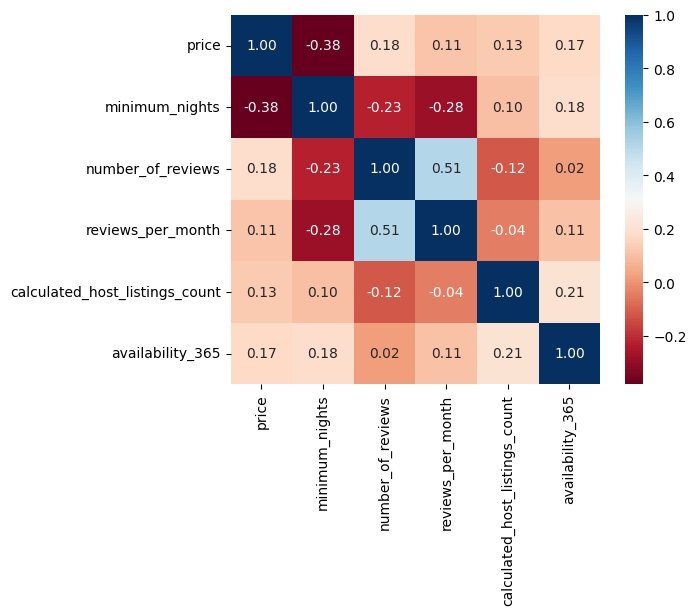

In [22]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

#### Antes de interpretar o gráfico da correlação, é importante relembrar os indicativos e conceitos inclusos nele:

* **# O que é correlação:**
  correlação é uma forma descritiva que mede se há e qual o grau de dependência entre variáveis, ou seja, o quanto uma variável interfere em outra, lembrando que essa relação de dependência pode ou não ser causal. A medida desse grau é medida através de coeficientes.
* **# Coeficiente de Pearson:**
Conhecido como “coeficiente de correlação produto-momento”, mede o grau de correlação através do cálculo de direção positiva ou negativa. O intervalo de resultados desse coeficiente podem ser entre 1 e -1. Quanto mais próximo de 1, correlação forte. Mais próximo de -1, correlação forte sendo as duas variáveis utilizadas inversamente proporcional(Enquanto uma cresce, ou decresce).

#### Resultado da Correlação:

* Através do cálculo de correlação entre as colunas, temos por resultado, uma correlação fraca, ou seja, A maioria das colunas não interferem no valor da outra(Valores próximos de 0)
* Somente as variáveis "number_of_reviews" e "Reviews_per_month" possuem uma relação moderada(0.51). O que fica bem claro, já que a medida que os valores de "Reviews_per_month" aumentam, os valores da outra variável, "number_of_reviews", também aumentam. Mas do contrário, não acontece frequentemente, pode haver várias avaliações em um único mês, no restante não haver outras avaliações.

### **Q8. Qual o tipo de imóvel mais alugado no Airbnb?**

In [23]:
# mostrar a quantidade de cada tipo de imóvel disponível
#dict_valores_room_type = df_clean.room_type.value_counts()
dict_valores_room_type = df_clean.groupby(["room_type"]).room_type.count()
print(f"O Imóvel mais alugado no Airbnb é: {dict_valores_room_type.keys().sort_values(ascending=False)[0]} \n")
dict_valores_room_type


O Imóvel mais alugado no Airbnb é: Shared room 



room_type
Entire home/apt    9838
Hotel room          139
Private room       6568
Shared room         147
Name: room_type, dtype: int64

In [32]:
# mostrar a porcentagem de cada tipo de imóvel disponível
try:
  valores = ((df_clean.groupby(["room_type"])).room_type.count()/df_clean.shape[0]).round(3)
  keys = valores.keys()
#print(keys)
  for index, keys in enumerate(keys):
    print(f"A porcentagem em relação ao total: {keys} é {(valores[index]*100):.2f}% dos imóveis, correspondendo ao valor: {dict_valores_room_type[index]} ")
except:
  print("Erro")

A porcentagem em relação ao total: Entire home/apt é 58.90% dos imóveis, correspondendo ao valor: 9838
A porcentagem em relação ao total: Hotel room é 0.80% dos imóveis, correspondendo ao valor: 139
A porcentagem em relação ao total: Private room é 39.30% dos imóveis, correspondendo ao valor: 6568
A porcentagem em relação ao total: Shared room é 0.90% dos imóveis, correspondendo ao valor: 147


In [25]:
#dict_valores_room_type = df_clean.groupby(["room_type"]).room_type.count()
condicao_mensal = (df_clean["minimum_nights"] <= 32) & (df_clean["minimum_nights"] >= 28)
condicao_final_de_semana = (df_clean["minimum_nights"] <= 3) & (df_clean["minimum_nights"] >= 1)

quant_room_type_condicao_mensal = df_clean.groupby(df_clean.room_type[condicao_mensal]).room_type.count()
quant_room_type_condicao_final_de_semana = df_clean.groupby(df_clean.room_type[condicao_final_de_semana]).room_type.count()

print("Porcentagem dos tipos de apartamento com base na condição de quantidade de noites, no intervalo de (28-32 noites) e (1-3 noites), respectivamente:\n")
for index, key in enumerate(quant_room_type_condicao_mensal.keys()):
  quant_total_por_tipo_quarto = dict_valores_room_type[index]
  print(f"{key}: {(quant_room_type_condicao_mensal)[index]} imóveis, {((quant_room_type_condicao_mensal)[index])*100/quant_total_por_tipo_quarto:.2f}% ")
  print(f"{key}: {(quant_room_type_condicao_final_de_semana)[index]} imóveis, {((quant_room_type_condicao_final_de_semana)[index])*100/quant_total_por_tipo_quarto:.2f}%")
  print(f"Total: {(quant_room_type_condicao_mensal)[index] + (quant_room_type_condicao_final_de_semana)[index]}, {((quant_room_type_condicao_mensal)[index] + (quant_room_type_condicao_final_de_semana)[index])*100/quant_total_por_tipo_quarto:.2f}%\n")


Porcentagem dos tipos de apartamento com base na condição de quantidade de noites, no intervalo de (28-32 noites) e (1-3 noites), respectivamente:

Entire home/apt: 3494 imóveis, 35.52% 
Entire home/apt: 5316 imóveis, 54.04%
Total: 8810, 89.55%

Hotel room: 3 imóveis, 2.16% 
Hotel room: 136 imóveis, 97.84%
Total: 139, 100.00%

Private room: 1908 imóveis, 29.05% 
Private room: 3955 imóveis, 60.22%
Total: 5863, 89.27%

Shared room: 21 imóveis, 14.29% 
Shared room: 123 imóveis, 83.67%
Total: 144, 97.96%



* **OBS: Porcentagens em que o total não sejam 100%, significa que a quantidade de noites mínimas oferecidas, está parte fora do intervalo analisado.**
* Com base nesses dados, é possível perceber que **Hotéis e quarto compartilhado não oferecem muitos imóveis para alugar por um período mensal(2.16% para imóveis de hotel e 14.29% para quarto compartilhado)**, mas para **alugar durante 1-3 noites, possuem boa quantidade de imóveis disponíveis(97.84% imóveis de hotel e 83.67% para quarto compartilhado)**.
* Por outro lado, com valores mais equilibrados entre a quantidade de propriedades para alugar mensalmente ou para alguns dias, os estilos de "Casa/apartamento inteiro" e "Quarto privado" oferecem boas porcentagens. Sendo para **aluguel mensal(35.52% para "Casa/apartamento inteiro" e 29.05% para "Quarto privado")** e para **aluguel entre 1-3 noites(54.04% para "Casa/apartamento inteiro" e 60.22% para "Quarto privado")**.

### **Q9. Qual a localidade mais cara do dataset?**



In [26]:
# ver preços por bairros, na média
df_clean.groupby(["neighbourhood"]).price.mean().sort_values(ascending=False).round(2)[:]
# Pode ser que apesar do primeiro ter o maior valor de média de valor, mas devido a quantidade de imóveis,
# o preço tende a ficar mais mediano. Tem que analisar a localidade e os reais preços, para assim analisar realmente se os dados batem

neighbourhood
la Vila Olímpica del Poblenou                   212.42
Diagonal Mar i el Front Marítim del Poblenou    204.60
la Dreta de l'Eixample                          203.01
la Marina del Prat Vermell                      190.11
l'Antiga Esquerra de l'Eixample                 170.83
                                                 ...  
la Prosperitat                                   44.70
la Trinitat Nova                                 42.17
el Turó de la Peira                              33.28
la Trinitat Vella                                31.80
la Clota                                         25.00
Name: price, Length: 70, dtype: float64

In [27]:
print(f"€{media_preco_aluguel}")

€144.97


* Os 10 primeiros bairros estão com valores médios de aluguel, acima da média total(144.97 euros)
* A média mais alta é do bairro "la Vila Olímpica del Poblenou", no valor de €212.41, equivalente a R$1,140.60

* A menor média foi de "la Clota", no valor de €25.00, equivalente a R$134.25

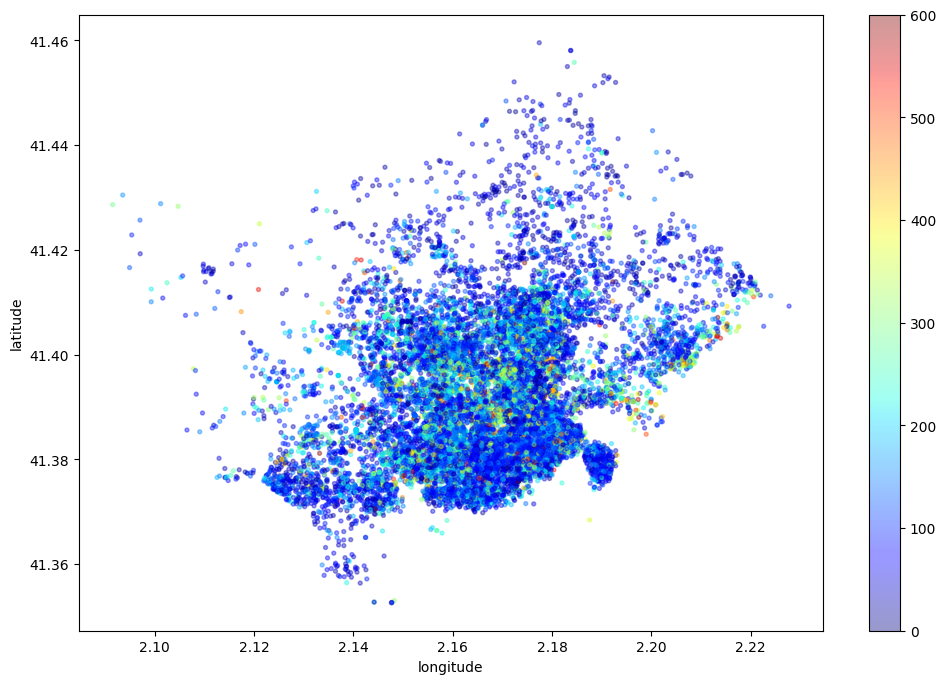

In [28]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

### **Q10. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [29]:
# ver a média da coluna `minimum_nights``
df.minimum_nights.mean().round(0)

14.0

* Em média, a quantidade de noites mínimas para alugar um imóvel é 14 noites

## Conclusões


* Um dataset com uma boa quantidade de dados, 17230 entradas. Possui alguns valores "outliers" e também uma certa quantidade vazia de dados. Foi feito uma limpeza analisando certos intervalos, com o objetivo de não comprometer o dataset principal
* A média de preço de aluguel em Barcelona é €144.97, equivalente à R$774.52. E a média de noites mínimas para alugar um imóvel é 14 noites.

-- A média de valores nos distritos:
* Eixample: €175.46, igual à R$941.87
  
  * Distrito central, tem como atrativos turísticos: "Casa Betlla" E a Basílica "La sagrada Família"
  * Possui 2 dos bairros mais caros, sendo eles: "la Dreta de l'Eixample"(€203.01) E "l'Antiga Esquerra de l'Eixample"(€170.83)

* Les Corts: €145.59, igual à R$781.52

  * Distrito afastado do centro, tem como atrativos turísticos: "Camp Nou", "Pedralbes Royal Palace"

* Sarrià-Sant Gervasi: €144.44, igual à R$775.35

  * Distrito afastado do centro, tem como atrativos turísticos: "Monastery of Pedralbes"

* Gràcia: €142.69, igual à R$765.96

  * Distrito central, tem como atrativos turísticos: "Parque Güell", "Casa Vicens"

* Sant Martí: €141.81, igual à R$761.23

  * Distrito costeiro, tem como atrativos turísticos: "Ciutadella Park", "Arco de Triunfo de Barcelona", "Zoo de Barcelona", "Parc de la ciutadella"
  * Possui 2 dos bairros mais caros, sendo eles: "la Vila Olímpica del Poblenou"(€212.42) E "Diagonal Mar i el Front Marítim del Poblenou"(€204.60)

-- Para turistas que gostariam de passar o final de semana em Barcelona, existem bastante imóveis que a quantidade mínima de noites para alugar fica entre 1 e 3 noites, 9530 imóveis de 16692 no total.

-- "Sants-Montjuïc" é um distrito que sua média de valor do aluguel é de €122.66, um valor abaixo da média e que também possui muitos pontos turísticos, como: "Poble Espanyol", "Fonte Mágica de Montjuic", "National Art Museum of Catalunya - MNAC", "Fundação Joan Miró". Um distrito costeiro, perto de praias. É uma ótima escolha pensando no valor e atrativos turísticos.

-- Para acessar um mapa interativo, com endereços e valores das casas, disponibilizado pelo Airbnb, basta acessar o link: [Mapa_Airbnb](http://insideairbnb.com/barcelona/)